In [1]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt
from scipy import sparse as sp
from time import time
import scipy.sparse.linalg as spla
from math import sqrt
import simulated_data as simd
import data_strm_subclass as dssb
import streaming_subclass as stsb
import plot_functions as pf
from scipy.io import loadmat
import pickle

In [2]:
def plot_hpca_ada(adaoja, hpca, data_name, k):
    plt.plot(adaoja.acc_indices, adaoja.accQ, label='AdaOja')
    plt.plot(hpca.acc_indices, hpca.accQ, label='HPCA')
    plt.legend(loc='best')
    plt.title('HPCA vs AdaOja\n' + data_name + ' data set, k=' + str(k))
    plt.xlabel('Number of samples')
    plt.ylabel('Explained Variance')
    plt.savefig('hpcavada_' + data_name + '_k' + str(k) + '.png')
    plt.show()

In [3]:
def exp_var(X, W, xnorm2=None):
    if xnorm2 is not None:
        return la.norm(X @ W, ord='fro')**2 / xnorm2
    else:
        return la.norm(X @ W, ord='fro')**2 / la.norm(X, ord='fro')**2

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
db1 = unpickle('data_batch_1')[b'data']
db2 = unpickle('data_batch_2')[b'data']
db3 = unpickle('data_batch_3')[b'data']
db4 = unpickle('data_batch_4')[b'data']
db5 = unpickle('data_batch_5')[b'data']

In [6]:
db1.shape

(10000, 3072)

In [7]:
CIFAR = np.vstack((db1, db2, db3, db4, db5))
CIFAR_sc = CIFAR - CIFAR.mean(axis=0)
CIFAR_norm2 = la.norm(CIFAR_sc, ord='fro')**2
v_CIFAR = la.eigh(np.cov(CIFAR.T))[1][:,::-1]


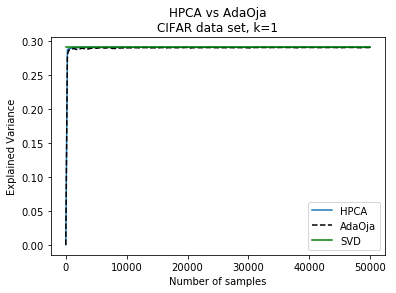

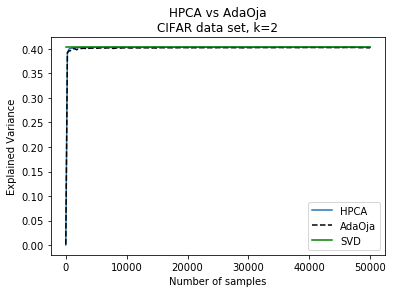

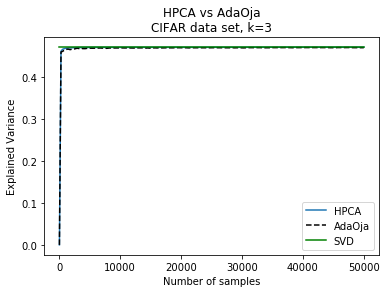

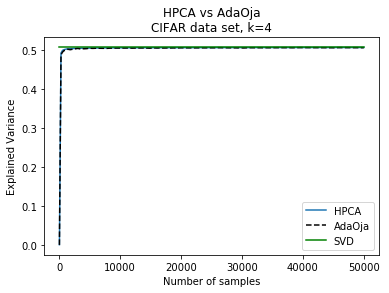

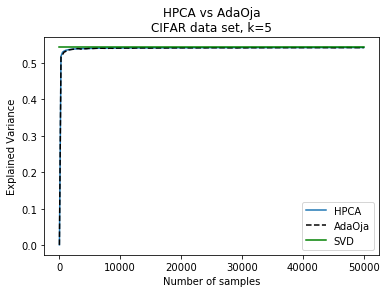

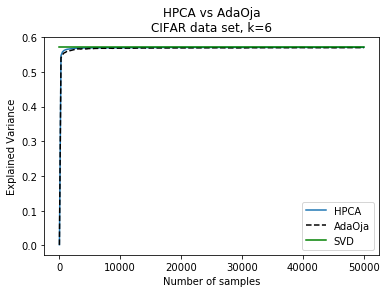

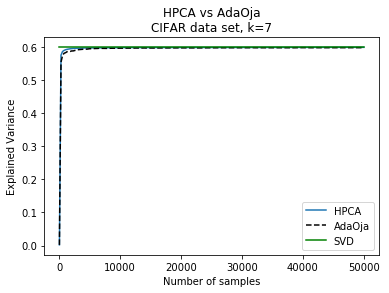

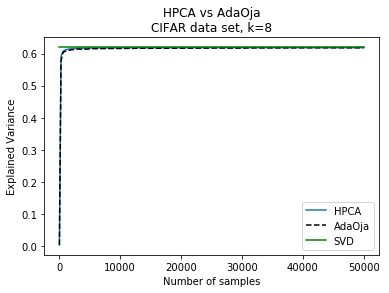

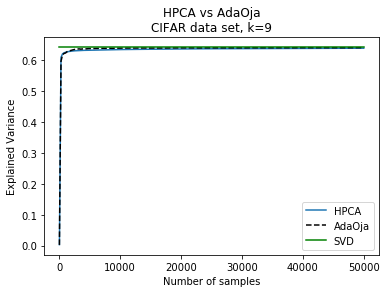

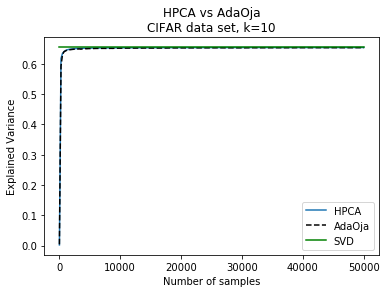

In [10]:
B = 10
for k in range(1, 11):
    ada_CIFAR, hpca_CIFAR = dssb.run_sim_fullX(CIFAR_sc, k, B=B, Sparse=False, xnorm2 = CIFAR_norm2, num_acc=200)
    CIFAR_evar = exp_var(CIFAR_sc, v_CIFAR[:,:k], xnorm2=CIFAR_norm2)
    plt.plot(hpca_CIFAR.acc_indices, hpca_CIFAR.accQ, label='HPCA')
    plt.plot(ada_CIFAR.acc_indices, ada_CIFAR.accQ, '--', color='black', label='AdaOja')
    plt.plot(ada_CIFAR.acc_indices, np.ones(201) * CIFAR_evar, color='green', label='SVD')
    plt.title('HPCA vs AdaOja\n' + 'CIFAR data set, k=' + str(k))
    plt.xlabel('Number of samples')
    plt.ylabel('Explained Variance')
    plt.legend(loc='best')
    plt.savefig('hpcavada_CIFAR_k' + str(k) + '.png')
    plt.show()

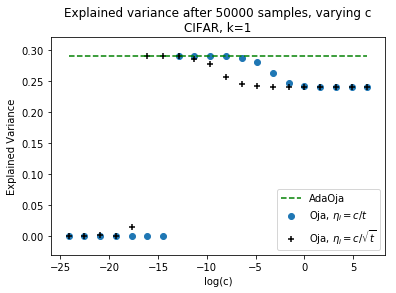

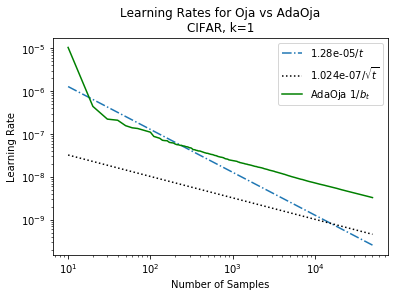

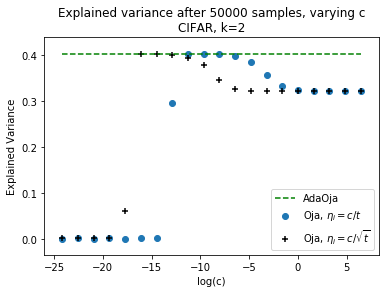

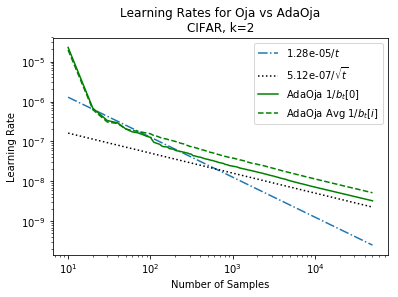

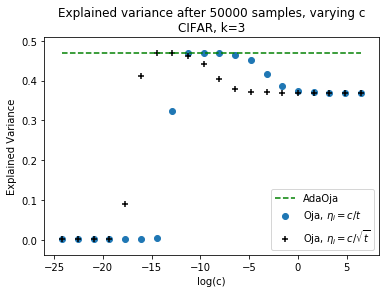

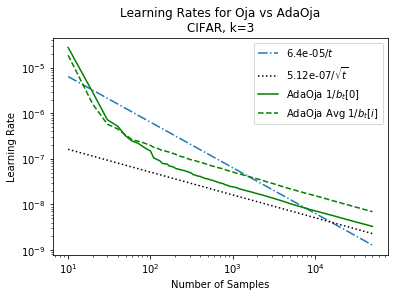

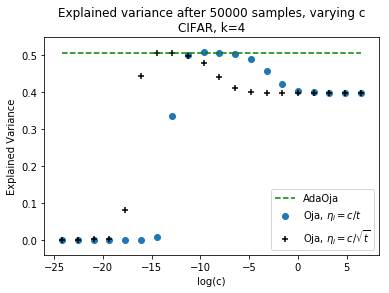

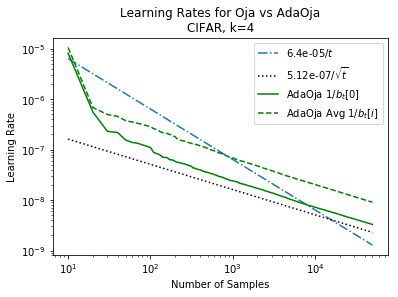

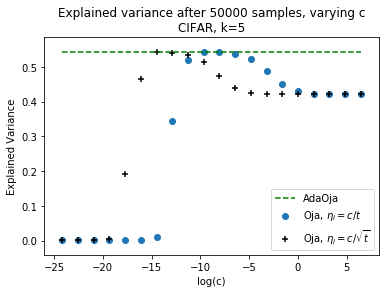

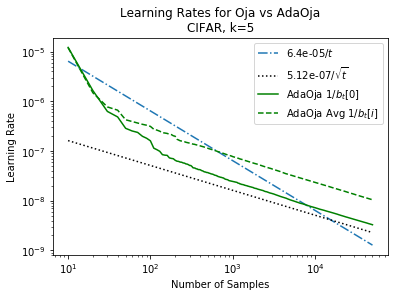

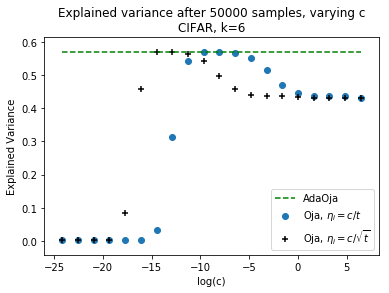

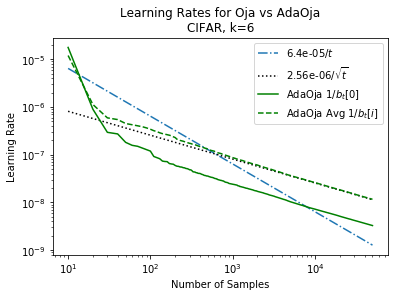

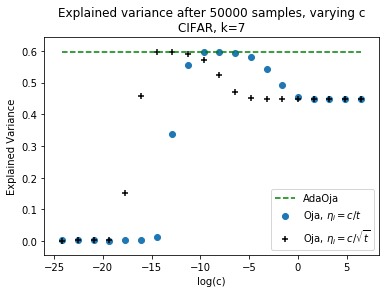

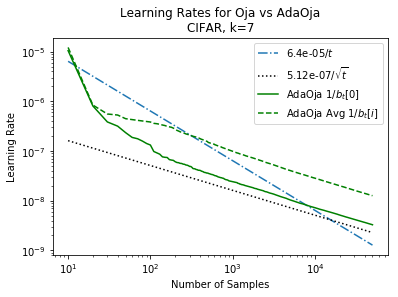

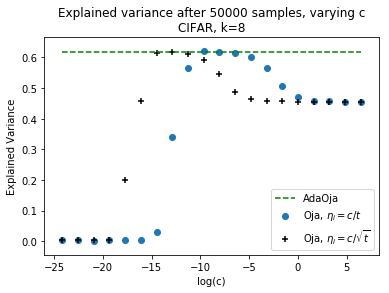

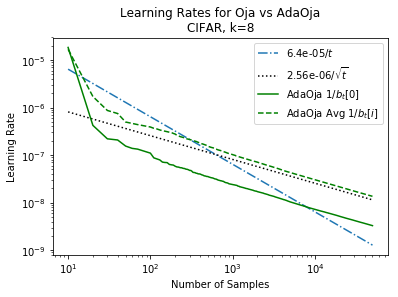

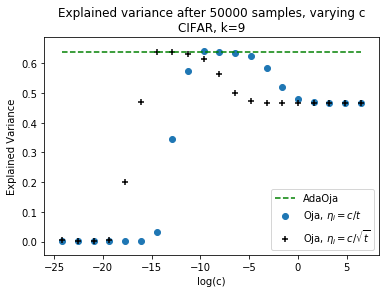

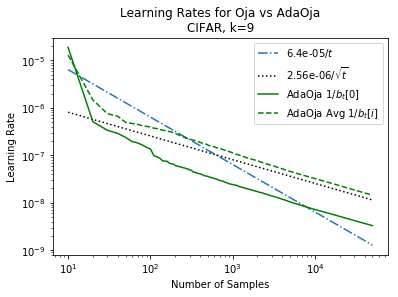

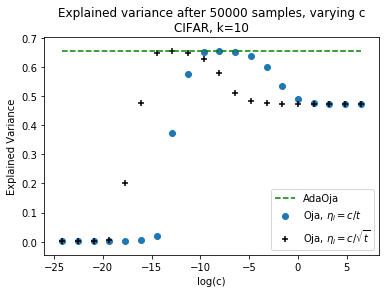

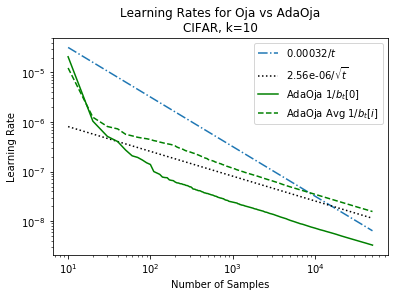

In [11]:
B = 10
CIFAR_lr = pf.compare_lr(base=5., lower=-15, upper=5)
for k in range(1,11):
    CIFAR_lr.run_cval_fullX(CIFAR_sc, k, B, Sparse=False, xnorm2=CIFAR_norm2)
    CIFAR_lr.plot_cval_acc('CIFAR, k=' + str(k), 'CIFAR_cvals_k' + str(k) + '.png')
    CIFAR_lr.plot_bvals('CIFAR, k=' + str(k), 'CIFAR_lr_k' + str(k) + '.png')

In [23]:
ada_CIFAR.time_vals[-1]

0.11860084533691406

In [8]:
%%timeit
#v_CIFAR = la.eigh(np.cov(CIFAR.T))[1][:,::-1]
np.cov(CIFAR.T)

1 loop, best of 3: 7.71 s per loop


In [26]:
cov_CIFAR = np.cov(CIFAR.T)

In [29]:
%%timeit
v_CIFAR = la.eigh(cov_CIFAR)[1][:,::-1]


1 loop, best of 3: 4.12 s per loop


In [58]:
hpca_CIFAR.time_vals[-1]

0.12160181999206543